# GeoPandas

## Introduction

[GeoPandas](https://geopandas.org) is an open-source project that makes working with geospatial data in Python easier. It extends the datatypes used by pandas to allow spatial operations on geometric types. GeoPandas combines the capabilities of pandas and Shapely, providing geospatial operations in a pandas-like interface.

## Installing and Importing GeoPandas

In [ ]:
# %pip install geopandas

Once installed, you can import it like this:

In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

## Creating GeoDataFrames

A GeoDataFrame is a tabular data structure that contains a 'geometry' column, which holds the geometric shapes. You can create a GeoDataFrame from a list of geometries or from a pandas DataFrame.

In [2]:
# Creating a GeoDataFrame from scratch
import pandas as pd

data = {
    'City': ['Tokyo', 'New York', 'London', 'Paris'],
    'Latitude': [35.6895, 40.7128, 51.5074, 48.8566],
    'Longitude': [139.6917, -74.0060, -0.1278, 2.3522],
}

df = pd.DataFrame(data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
print(gdf)

       City  Latitude  Longitude                    geometry
0     Tokyo   35.6895   139.6917  POINT (139.69170 35.68950)
1  New York   40.7128   -74.0060  POINT (-74.00600 40.71280)
2    London   51.5074    -0.1278   POINT (-0.12780 51.50740)
3     Paris   48.8566     2.3522    POINT (2.35220 48.85660)


## Reading and Writing Geospatial Data

GeoPandas makes it easy to read and write geospatial data formats like Shapefiles, GeoJSON, and others. Let's read a shapefile and write the GeoDataFrame to a GeoJSON file.

In [3]:
# Reading a shapefile
try:
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    print(world.head())
except Exception as e:
    print(f"An error occurred: {e}")

# Writing the GeoDataFrame to a GeoJSON file
output_file = 'world.geojson'
try:
    world.to_file(output_file, driver='GeoJSON')
    print(f"GeoDataFrame has been written to {output_file}")
except Exception as e:
    print(f"An error occurred while writing to {output_file}: {e}")

/tmp/ipykernel_46099/3603450562.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/home/qiusheng/miniconda3/envs/geo/lib/gdalplugins/ogr_Arrow.so: undefined symbol: _ZNK5arrow16KeyValueMetadata3GetERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
/home/qiusheng/miniconda3/envs/geo/lib/gdalplugins/ogr_Arrow.so: undefined symbol: _ZNK5arrow16KeyValueMetadata3GetERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
/home/qiusheng/miniconda3/envs/geo/lib/gdalplugins/ogr_Parquet.so: undefined symbol: _ZNK5arrow16KeyValueMetadata8ContainsERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
/home/qiusheng/miniconda3/envs/geo/lib/gdalplugins/ogr_Parquet.so: undefined symbol: _ZNK5arrow16KeyValueMetadata8ContainsERKNSt7__cxx1112basic_stringIc

       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
GeoDataFrame has been written to world.geojson


## Spatial Operations

GeoPandas provides a range of spatial operations, such as buffering, intersections, and spatial joins. Let's explore some of these operations.

In [4]:
# Example of buffering (creating a buffer zone around points)
gdf['buffer'] = gdf.buffer(1)  # Buffer of 1 degree
print(gdf[['City', 'buffer']])

       City                                             buffer
0     Tokyo  POLYGON ((140.69170 35.68950, 140.68688 35.591...
1  New York  POLYGON ((-73.00600 40.71280, -73.01082 40.614...
2    London  POLYGON ((0.87220 51.50740, 0.86738 51.40938, ...
3     Paris  POLYGON ((3.35220 48.85660, 3.34738 48.75858, ...


In [6]:
# Example of spatial join (finding points within a polygon)
paris = gdf[gdf['City'] == 'Paris']
polygon = Polygon([(2, 48), (2.5, 48), (2.5, 49), (2, 49)])
polygon_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=gdf.crs)
joined = gpd.sjoin(gdf, polygon_gdf, predicate='within')
print(joined)

    City  Latitude  Longitude                  geometry  \
3  Paris   48.8566     2.3522  POINT (2.35220 48.85660)   

                                              buffer  index_right  0  
3  POLYGON ((3.35220 48.85660, 3.34738 48.75858, ...            0  1  


## Plotting Geospatial Data

GeoPandas integrates well with Matplotlib, allowing you to easily plot geospatial data. Let's plot the world map with the locations of the cities from our GeoDataFrame.

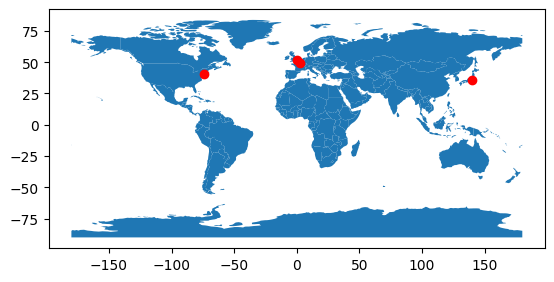

In [7]:
import matplotlib.pyplot as plt

# Plotting the world map and the cities
world.plot()
gdf.plot(ax=plt.gca(), color='red')
plt.show()

In [9]:
gdf.crs = 'EPSG:4326'
gdf.explore()

## Exercises

1. Create a GeoDataFrame containing a list of countries and their capital cities. Add a geometry column with the locations of the capitals.
2. Load a shapefile of your choice, filter the data to only include a specific region or country, and save the filtered GeoDataFrame to a new file.
3. Perform a spatial join between two GeoDataFrames: one containing polygons (e.g., country borders) and one containing points (e.g., cities). Find out which points fall within which polygons.
4. Plot a map showing the distribution of a particular attribute (e.g., population) across different regions.

In [ ]:
# Type your code here

## Conclusion

GeoPandas is a powerful tool for geospatial data analysis in Python. It combines the capabilities of pandas with the geometric operations of Shapely, allowing for efficient and intuitive geospatial data manipulation. By practicing with these exercises, you can gain a solid understanding of how to work with geospatial data using GeoPandas.